In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [76]:
# load csv files into pandas dataframes
results = pd.read_csv('results_ECG.csv', sep=",")
targets = pd.read_csv('targets_ECG.csv', sep=",")

In [129]:
# column headers for each dataframe
display(list(results.columns.values)) 
display(list(targets.columns.values)) 
res_col_names = list(results.columns.values)
targ_col_names = list(targets.columns.values)

['transient',
 'rhos',
 'reg',
 'lis',
 'iss',
 'con',
 'Nr',
 'Nl',
 '.sampling',
 'MSE',
 'outputs',
 'MSE_std',
 'outputs_std']

['sampling rate', 'test_targets']

In [78]:
# this function converts a column that contains long string-lists in individual cells to a list of arrays
def make_arr(col_name):
    if col_name == "test_targets":
        outputs = np.array(targets[col_name])
    else:
        outputs = np.array(results[col_name])

    out_mat = []
    for out in outputs:
        single = out.split(',')
        arr = []

        if col_name == "test_targets":
            for i in range(len(single)):
                if i == 0:
                    arr.append(float(single[i][2:len(single[i])]))
                elif i == len(single)-1:
                    arr.append(float(single[i][0:(len(single[i])-2)]))
                else:
                    arr.append(float(single[i]))
                out_mat.append(arr)

        else:
            for i in range(len(single)):
                if i == 0:
                    arr.append(float(single[i][1:len(single[i])]))
                elif i == len(single)-1:
                    arr.append(float(single[i][0:(len(single[i])-1)]))
                else:
                    arr.append(float(single[i]))
            out_mat.append(arr)

    return out_mat

In [137]:
# this function returns the configuration of a requested index
# included MSE values
# also prints configuration with column names
def get_config(index):
    config = []
    for i in range(9):
        print(res_col_names[i], " = ", results[res_col_names[i]][index])
        config.append(results[res_col_names[i]][index])
    print("self_fed_MSE = ", results[res_col_names[9]][index])
    config.append(results[res_col_names[9]][index])
    print("signal_fed_MSE = ", results[res_col_names[11]][index])
    config.append(results[res_col_names[11]][index])
    return config

In [79]:
# necessary columns to convert for results.csv
# renamed for qualitative clarity
# first index corresponds which configuration is used
self_fed_mat = make_arr("outputs")
signal_fed_mat = make_arr("outputs_std")

In [109]:
# conversion for targets
orig_signal_mat = make_arr("test_targets")

In [111]:
# collect standard deviations

self_fed_std = []
signal_fed_std = []
orig_signal_std = np.std(orig_signal_mat[0])

for i in range(len(self_fed_mat[0])):
    self_fed_std.append(np.std(self_fed_mat[i]))
    signal_fed_std.append(np.std(signal_fed_mat[i]))

14.100559371193786
0.7895814598361249


In [117]:
print(np.argmax(self_fed_std))
print(np.argmax(signal_fed_std))

3621
3728


In [139]:
max_std_sig = get_config(3728)

transient  =  1000
rhos  =  3.0
reg  =  0.1
lis  =  0.1
iss  =  1.0
con  =  1.0
Nr  =  200
Nl  =  5
.sampling  =  10
self_fed_MSE =  0.9583660791334052
signal_fed_MSE =  0.6626702522484501


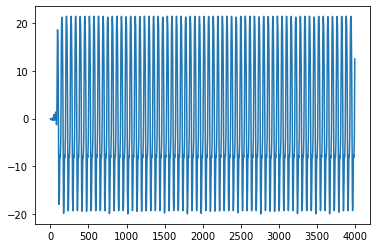

In [116]:
# for i in range(90):
#     plt.plot(self_fed_mat[i])
plt.plot(self_fed_mat[3621])
plt.show()

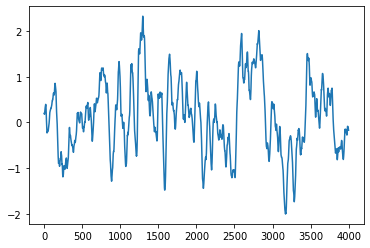

In [140]:
# for i in range(100):
#     plt.plot(signal_fed_mat[i])
plt.plot(signal_fed_mat[3728])
plt.show()

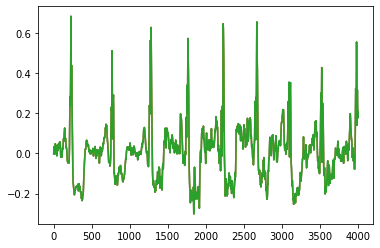

In [103]:
for i in range(3):
    plt.plot(orig_signal[i])
plt.show()